In [19]:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Config
sns.set(color_codes=True)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [20]:
from useful_functions import *

## Score constituencies

In [21]:
ge10, ge15, ge17 = read_in_election_results() 

In [22]:
diff_17 = score_campaigns_difference(ge17, ge15)
uns_17 = score_campaigns_uns(ge17, ge15)
mrp_17 = score_campaigns_mrp(ge17)

In [23]:
incumbent = ge15.index[ ge15['winner'] == 'lab' ]
challenge = ge15.index[ ge15['winner'] != 'lab' ]

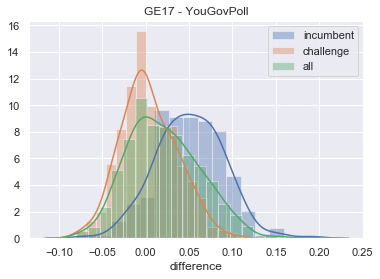

In [35]:
ax = sns.distplot(mrp_17.loc[incumbent,'difference'].dropna(),label='incumbent').set_title('GE17 - YouGovPoll')
ax = sns.distplot(mrp_17.loc[challenge,'difference'].dropna(),label='challenge')
ax = sns.distplot(mrp_17['difference'].dropna(),label='all')

plt.legend()

In [30]:
print(np.mean(mrp_17.loc[incumbent,'difference'].dropna()))
print(np.mean(mrp_17.loc[challenge,'difference'].dropna()))
print(np.mean(mrp_17['difference'].dropna()))

0.050815658544459505
0.0037732068838266884
0.02106932223290246


In [31]:
print(np.mean(uns_17.loc[incumbent,'difference'].dropna()))
print(np.mean(uns_17.loc[challenge,'difference'].dropna()))
print(np.mean(uns_17['difference'].dropna()))

0.011006605156311897
-0.010523439589858663
-0.002607480190315762


232

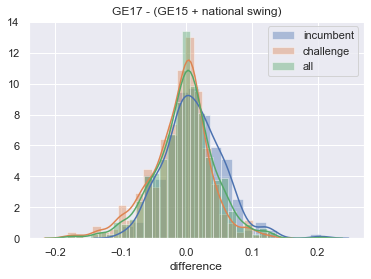

In [36]:
ax = sns.distplot(uns_17.loc[incumbent,'difference'].dropna(),label='incumbent').set_title('GE17 - (GE15 + national swing)')
ax = sns.distplot(uns_17.loc[challenge,'difference'].dropna(),label='challenge')
ax = sns.distplot(uns_17['difference'].dropna(),label='all')

plt.legend()
len(incumbent)